# Experimento doble rendija cuántico

Vamosa a calcular y modelar la distribución de probabilidades (intensidades) de un fotón que pasa a través de una configuración de doble rendija, donde se utiliza interferencia cuántica para modelar el patrón de interferencia resultante.

<ipython-input-2-7aeee4c2debd>:72: ComplexWarning: Casting complex values to real discards the imaginary part
  P1[l + lx, k + ly] = intensity


SP (0.041126005023292604+0j) Dx 4.0


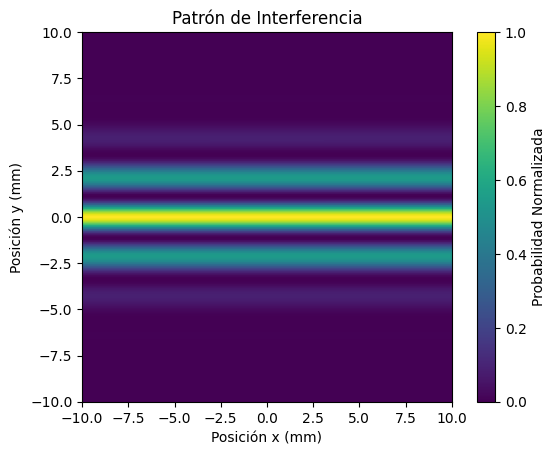

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Constantes
N = 4  # número de puntos en la pantalla
r0 = 2.5e-1  # distancia entre rendijas en mm (2.5e-4 m -> 2.5e-1 mm)
lambda1 = 810e-6  # longitud de onda de emisión en mm (810e-9 m -> 810e-6 mm)
pi = np.pi
s = 0.5  # radio de la sección transversal de fotón en mm (0.005 m -> 5 mm)
Dx = 2.0  # anchura de la modulación gaussiana en mm (0.002 m -> 2 mm)
hbar = 6.6262e-34
e0 = 8.85e-12
omega = 2 * pi / lambda1
E = hbar * omega  # energía del fotón
i = 1j  # i complejo
Di = pi * s ** 2 # Calculo de la sección transversal de la rendija

# Punto de observación
pz = 700  # alejamiento de la pantalla en mm (0.57 m -> 570 mm)
lx = 100  # máximo abs(x) en la pantalla /10000
ly = 100  # máximo abs(y) en la pantalla /10000

SP = 0.0
nx = 0

# Abrir archivos
distancias_file = open('distancias', 'w')
Pint_file = open('Pint', 'w')
qgauss_file = open('qgauss', 'w')

P1 = np.zeros((2 * lx + 1, 2 * ly + 1))

for l in range(-lx, lx + 1):  # loop en la dirección x de observación
    nx += 1
    px = float(l) / 10.0  # Conversion a mm (l / 10000.0 m -> l / 10.0 mm)
    for k in range(-ly, ly + 1):  # loop en la dirección de y
        py = float(k) / 10.0  # Conversion a mm (k / 10000.0 m -> k / 10.0 mm)

        Ap = 0j  # amplitud de probabilidad
        rss = random.random()  # rendija random

        for j in range(1, N + 1):  # loop para construir las posiciones de las fuentes
            # posición de la fuente n es
            r = r0 / 2.0  # posición de las fuentes
            z = 0.0
            x = ((-1) ** j) * r
            y = 0.0
            d = np.sqrt((px - x) ** 2 + (py - y) ** 2 + (pz - z) ** 2)  # d fuente-observación
            V = Di * d
            ter = (E / (2 * e0 * V)) ** 0.5
            f = i * ter
            f = 1.0
            Aphase = (1.0 / np.sqrt(float(N))) * f * np.exp((i * 2 * pi) * d / lambda1)

            # BORRADO CUÁNTICO
            # if j == 1:
            #     if rss >= 0.5:
            #         Aphase = 0j
            # else:
            #     if rss < 0.5:
            #         Aphase = 0j
            # FIN BORRADO CUÁNTICO

            Ap += Aphase / d

        # if abs(d[0] - d[1]) >= 0.000002:
        #     Ap = 0.0

        rmod = np.exp(-(px ** 2) / (2 * Dx ** 2))
        intensity = (Ap * np.conj(Ap)) * rmod
        P1[l + lx, k + ly] = intensity

        SP += intensity
        Pint_file.write(f'{px} {py} {intensity.real}\n')  # Escritura de probabilidad izquierda

    qgauss_file.write(f'{px} {rmod}\n')
    #print(l)  # cierre de posición y

print('SP', SP, 'Dx', Dx ** 2)

# Cerrar archivos
distancias_file.close()
Pint_file.close()
qgauss_file.close()

# Normalizar probabilidades
P1 /= np.max(P1)  # Normalización de probabilidades


# Graficar las probabilidades
plt.imshow(P1, extent=[-lx/10.0, lx/10.0, -ly/10.0, ly/10.0], origin='lower', cmap='viridis', vmin=0, vmax=1)
plt.colorbar(label='Probabilidad Normalizada')
plt.title('Patrón de Interferencia')
plt.xlabel('Posición x (mm)')
plt.ylabel('Posición y (mm)')
plt.show()

# Borrado Cuántico

Introduciremos una linea que nos permitira borrar este patrón generado

<ipython-input-4-89c77bb63e71>:64: ComplexWarning: Casting complex values to real discards the imaginary part
  P1[l + lx, k + ly] = (Ap * np.conj(Ap)) * rmod


SP 0.0 Dx 4.0


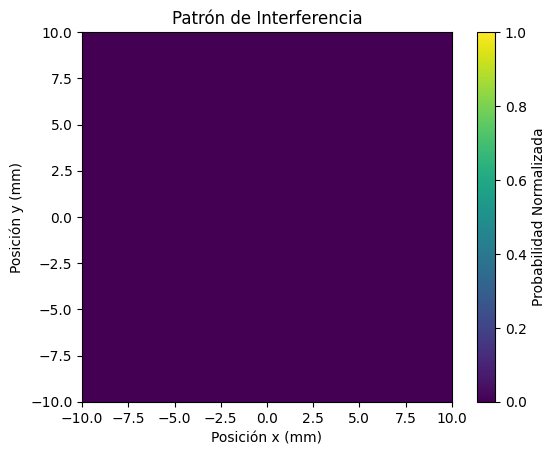

In [4]:
# Constantes
N = 4  # número de puntos en la pantalla
r0 = 2.5e-1  # distancia entre rendijas en mm (2.5e-4 m -> 2.5e-1 mm)
lambda1 = 810e-6  # longitud de onda de emisión en mm (810e-9 m -> 810e-6 mm)
pi = np.pi
s = 5.0  # radio de la sección transversal de fotón en mm (0.005 m -> 5 mm)
Dx = 2.0  # anchura de la modulación gaussiana en mm (0.002 m -> 2 mm)
hbar = 6.6262e-34
e0 = 8.85e-12
omega = 2 * pi / lambda1
E = hbar * omega  # energía del fotón
i = 1j  # i complejo
Di = pi * s ** 2 # Calculo de la sección transversal de la rendija

# Punto de observación
pz = 570  # alejamiento de la pantalla en mm (0.57 m -> 570 mm)
lx = 100  # máximo abs(x) en la pantalla /10000
ly = 100  # máximo abs(y) en la pantalla /10000

SP = 0.0
nx = 0

# Archivos (solo para escritura de datos)
distancias_file = open('distancias', 'w')
Pint_file = open('Pint', 'w')
qgauss_file = open('qgauss', 'w')

P1 = np.zeros((2 * lx + 1, 2 * ly + 1))  # Matriz para almacenar probabilidades

for l in range(-lx, lx + 1):  # bucle en la dirección x de observación
    nx += 1
    px = float(l) / 10000.0   # convertir a metros
    for k in range(-ly, ly + 1):  # bucle en la dirección de y
        py = float(k) / 10000.0  # convertir a metros

        Ap = 0j  # amplitud de probabilidad
        rss = random.random()  # rendija aleatoria

        for j in range(1, N + 1):  # bucle para construir las posiciones de las fuentes
            # posición de la fuente n
            r = r0 / 2.0  # posición de las fuentes
            z = 0.0
            x = ((-1) ** j) * r
            y = 0.0
            d = np.sqrt((px - x) ** 2 + (py - y) ** 2 + (pz - z) ** 2)  # distancia fuente-observación
            V = Di * d
            ter = np.sqrt(E / (2.0 * e0 * V))
            f = i * ter
            f = 1.0

            # Código de borrado cuántico
            if j == 1:
                if rss >= 0.5:
                    Aphase = 0j
            else:
                if rss < 0.5:
                    Aphase = 0j

            Aphase *= np.exp(i * 2 * pi * d / lambda1) / np.sqrt(float(N))

            Ap += Aphase / d

        rmod = np.exp(-(px ** 2) / (2.0 * Dx ** 2))
        P1[l + lx, k + ly] = (Ap * np.conj(Ap)) * rmod
        SP += P1[l + lx, k + ly]
        Pint_file.write(f'{px} {py} {P1[l + lx, k + ly].real}\n')

    qgauss_file.write(f'{px} {rmod}\n')
    #print(l)

print('SP', SP, 'Dx', Dx ** 2)

# cerrar archivos
distancias_file.close()
Pint_file.close()
qgauss_file.close()

# Graficar las probabilidades
plt.imshow(P1, extent=[-lx/10.0, lx/10.0, -ly/10.0, ly/10.0], origin='lower', cmap='viridis', vmin=0, vmax=1)
plt.colorbar(label='Probabilidad Normalizada')
plt.title('Patrón de Interferencia')
plt.xlabel('Posición x (mm)')
plt.ylabel('Posición y (mm)')
plt.show()

Codigo que muestra cuantos fotones estan entrando a la doble rendija

<ipython-input-6-0b0db4e8952b>:67: ComplexWarning: Casting complex values to real discards the imaginary part
  P1[l + lx, k + ly] = intensity


Máximo valor de probabilidades: 1.0
Fotones entrantes: 161604
Fotones salientes (proporcional a la intensidad): 0.041126005023292604


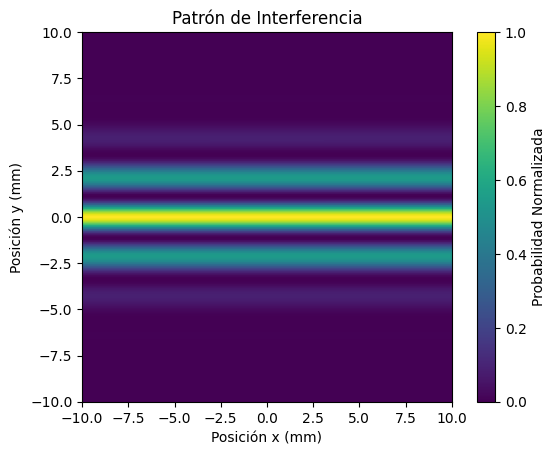

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Constantes
N = 4  # número de puntos en la pantalla
r0 = 2.5e-1  # distancia entre rendijas en mm (2.5e-4 m -> 2.5e-1 mm)
lambda1 = 810e-6  # longitud de onda de emisión en mm (810e-9 m -> 810e-6 mm)
pi = np.pi
s = 0.5  # radio de la sección transversal de fotón en mm (0.005 m -> 5 mm)
Dx = 2.0  # anchura de la modulación gaussiana en mm (0.002 m -> 2 mm)
hbar = 6.6262e-34
e0 = 8.85e-12
omega = 2 * pi / lambda1
E = hbar * omega  # energía del fotón
i = 1j  # i complejo
Di = pi * s ** 2  # Calculo de la sección transversal de la rendija

# Punto de observación
pz = 700  # alejamiento de la pantalla en mm (0.57 m -> 570 mm)
lx = 100  # máximo abs(x) en la pantalla /10000
ly = 100  # máximo abs(y) en la pantalla /10000

SP = 0.0
nx = 0

# Contadores de fotones
fotones_entrantes = 0
fotones_saliendo = 0

# Abrir archivos
distancias_file = open('distancias', 'w')
Pint_file = open('Pint', 'w')
qgauss_file = open('qgauss', 'w')

P1 = np.zeros((2 * lx + 1, 2 * ly + 1))

for l in range(-lx, lx + 1):  # loop en la dirección x de observación
    nx += 1
    px = float(l) / 10.0  # Conversión a mm (l / 10000.0 m -> l / 10.0 mm)
    for k in range(-ly, ly + 1):  # loop en la dirección de y
        py = float(k) / 10.0  # Conversión a mm (k / 10000.0 m -> k / 10.0 mm)

        Ap = 0j  # amplitud de probabilidad
        rss = random.random()  # rendija random

        for j in range(1, N + 1):  # loop para construir las posiciones de las fuentes
            # posición de la fuente n es
            r = r0 / 2.0  # posición de las fuentes
            z = 0.0
            x = ((-1) ** j) * r
            y = 0.0
            d = np.sqrt((px - x) ** 2 + (py - y) ** 2 + (pz - z) ** 2)  # d fuente-observación
            V = Di * d
            ter = (E / (2 * e0 * V)) ** 0.5
            f = i * ter
            f = 1.0
            Aphase = (1.0 / np.sqrt(float(N))) * f * np.exp((i * 2 * pi) * d / lambda1)

            # Contar los fotones que pasan por la rendija (asumiendo que cada iteración representa un fotón)
            fotones_entrantes += 1

            Ap += Aphase / d

        rmod = np.exp(-(px ** 2) / (2 * Dx ** 2))
        intensity = (Ap * np.conj(Ap)) * rmod
        P1[l + lx, k + ly] = intensity

        SP += intensity
        Pint_file.write(f'{px} {py} {intensity.real}\n')  # Escritura de probabilidad izquierda

        # Contar los fotones que salen y llegan a la pantalla
        fotones_saliendo += intensity.real

    qgauss_file.write(f'{px} {rmod}\n')

# Cerrar archivos
distancias_file.close()
Pint_file.close()
qgauss_file.close()

# Normalizar probabilidades
P1 /= np.max(P1)  # Normalización de probabilidades

# Verificación de normalización
print(f'Máximo valor de probabilidades: {np.max(P1)}')

# Mostrar cantidad de fotones entrantes y salientes
print(f'Fotones entrantes: {fotones_entrantes}')
print(f'Fotones salientes (proporcional a la intensidad): {fotones_saliendo}')

# Graficar las probabilidades
plt.imshow(P1, extent=[-lx/10.0, lx/10.0, -ly/10.0, ly/10.0], origin='lower', cmap='viridis', vmin=0, vmax=1)
plt.colorbar(label='Probabilidad Normalizada')
plt.title('Patrón de Interferencia')
plt.xlabel('Posición x (mm)')
plt.ylabel('Posición y (mm)')
plt.show()
